In [1]:
# Import my packages
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
from matplotlib import animation
from scipy.fft import fft, ifft, ifft2, fftfreq, fft2, fftshift
from scipy import signal
#from figure_1 import gauss_FT,time_filter,time_filter_der, gratings, contrast_fourier, filtered_contrast_f, filtered_contrast_f_dev, g_vm_cal_calculation

In [2]:
# Here I run all my functions from fig one
%run fig1_functions_latest.ipynb

In [3]:
###### parameters
t = np.arange(0, 12, 1/240)
x = np.arange(-180, 180, 0.5)
x_range = x
t_range = t
E_inh = -30 
E_exc = 60
c_o = 0.5
f=1
omega = 2*math.pi*f
k = (2*math.pi)/45
tau = 0.15 # ms
time_step = 1/240
x_initial = -180
which_stimulus = 'FTB_OFF' # choose the stimulus
FWHM = 5.7

In [36]:
# THIS WORKS
h,h_shifted, sample_freq_x = gauss_FT(FWHM, x_range)
###### Run my simulation and then basicaly just play with data
sample_freq_shifted,f_shifted = time_filter(tau,t,time_step)
sample_freq_shifted,f_dev_shifted = time_filter_der(tau,t,time_step)

f = np.linspace(0,32) #num=16
#omega = 2*math.pi*np.linspace(0,32,num=15)
k = np.linspace(-math.pi/90,math.pi/90) # ,num=16 k = (-1/30,-1/60,-1/120,0, 1/120, 1/60, 1/30)
c = np.empty([len(x),len(t),len(k),len(f)])
v_mem = np.empty([len(x),len(t),len(k), len(f)])
cal = np.empty([len(x),len(t),len(k), len(f)])
calcium_try= np.empty([len(x),len(t),len(k), len(f)])
calcium_new_try =np.empty([len(k), len(f)])
for i, kapa_value in enumerate(k):
    for j, f_value in enumerate(f):
        #print(f_value)
        contrast = gratings(c_o, f_value, kapa_value, t_range, x_range)
        c[:,:,i,j] = contrast
np.save(r'D:\b_Module_Fernanda\contrasts\gratings_for_spatiotemporal_tuning',c)
#c=np.load(r'D:\b_Module_Fernanda\contrasts\gratings_for_spatiotemporal_tuning.npy')

In [37]:
c.shape

(720, 1920, 50, 50)

In [38]:
# it works
for i, kapa_value in enumerate(k):
    for j, f_value in enumerate(f):
        c_shifted = contrast_fourier(c[:,:,i,j],x_range,t_range)
        filtered_c_f = filtered_contrast_f(sample_freq_x, sample_freq_shifted,c_shifted, f_shifted,h_shifted)
        filtered_c_dev = filtered_contrast_f_dev(sample_freq_x, sample_freq_shifted, c_shifted,f_dev_shifted,h_shifted)
        g1_div_g_l, g2_div_g_l, g3_div_g_l, V_m , calcium = g_vm_cal_calculation(filtered_c_f,filtered_c_dev)
        calcium_try[:,:,i,j] = (ramp(V_m))**2
        #calcium_new_try[i,j] = np.mean(calcium[:,100]) # axis=0
        #v_mem[:,:,i,j] = V_m
        cal[:,:,i,j] = calcium
#np.save(r'D:\b_Module_Fernanda\contrasts\calcium_for_spatiotemporal_tuning',cal)
#calcium=np.load(r'D:\b_Module_Fernanda\contrasts\calcium_for_spatiotemporal_tuning.npy')
#print(calcium.shape)

(720, 1920)


In [43]:
np.save(r'D:\b_Module_Fernanda\contrasts\calcium_for_spatiotemporal_tuning',calcium_try)

In [42]:
max_values = np.max(calcium_try, axis=1)

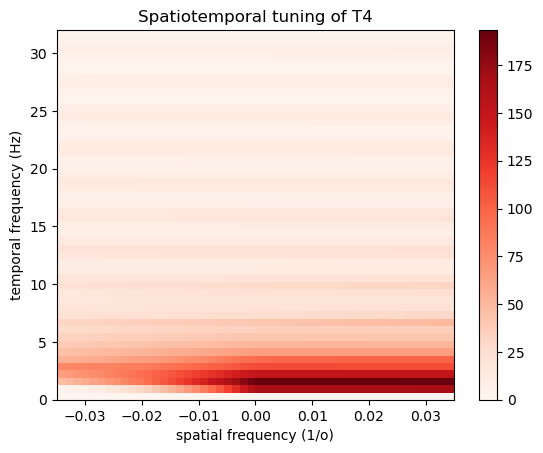

In [44]:
for i,x_value in enumerate(x):
    plt.imshow(max_values[i,:,:].T,cmap='Reds',extent=[k[0],k[-1],f[0],f[-1]],aspect = 'auto',origin='lower', norm = 'linear') #  vmin=0, vmax=50, extent=[ -0.3,0.3,0.5, 32,], aspect = 'auto', ) #,vmin=0, vmax=50 # extent is [x_min, x_max, y_min, y_max]
plt.xlabel('spatial frequency (1/o)')
plt.ylabel('temporal frequency (Hz)')
plt.title('Spatiotemporal tuning of T4')
plt.colorbar()